In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()
(path /'images').ls()
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['miniature_pinscher']

In [5]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size = 224, min_scale = 0.75))
dls = pets.dataloaders(path/"images")

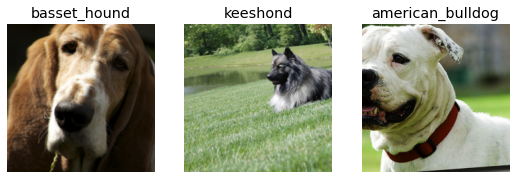

In [5]:
dls.show_batch(nrows=1, ncols=3)

In [7]:
pets1 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
)
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/oxford-iiit-pet/images/shiba_inu_180.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/oxford-iiit-pet/images/shiba_inu_180.jpg
    applying partial gives
      shiba_inu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(33)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(33))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline:

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 2 has shape: torch.Size([3, 380, 500])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [8]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.477190,0.377118,0.117727,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.507839,0.336199,0.100812,00:48
1,0.338081,0.230020,0.073748,00:49


# Cross-Entropy Loss

In [9]:
x, y = dls.one_batch()

In [12]:
y # range 0-37 - that many classes our dataset contain

TensorCategory([14,  6, 24, 33,  2, 15,  7, 10, 19, 34, 16,  8, 10,  0, 34, 13, 31, 13, 26, 30,  2,  9, 17, 32, 26, 14, 14, 32, 24, 34, 28, 16,  6, 14,  3, 10, 34,  5,  5, 11, 36, 24, 35, 11, 30, 35, 23,  3,
        34,  0, 16, 17, 23,  2, 23, 29, 22, 13, 27, 11, 25,  8, 18, 29], device='cuda:0')

In [14]:
# learn = vision_learner(dls, resnet34, metrics = error_rate)
preds, _ = learn.get_preds(dl = [(x, y)])
preds[0]

TensorBase([1.1847e-03, 9.9925e-05, 1.0760e-05, 6.3935e-06, 1.5942e-03, 1.2828e-04, 7.4119e-06, 2.1723e-05, 2.5876e-06, 5.8412e-04, 8.5868e-06, 3.5047e-05, 8.9136e-05, 6.2124e-05, 9.7780e-01, 9.5420e-03,
        4.5427e-05, 5.6966e-06, 6.0851e-03, 1.3124e-04, 3.8768e-04, 2.2757e-04, 1.3979e-05, 3.4858e-06, 2.4770e-06, 9.5443e-05, 4.6016e-05, 3.0290e-04, 9.9773e-06, 5.1554e-06, 1.9178e-05, 9.7344e-06,
        1.1045e-05, 3.1465e-05, 1.4813e-04, 1.2315e-03, 8.3422e-06])

In [15]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

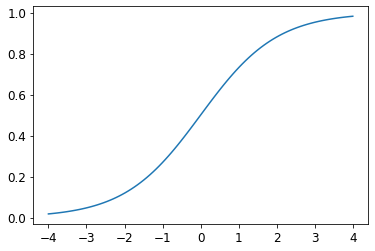

In [16]:
plot_function(torch.sigmoid, min=-4,max=4)

In [17]:
torch.random.manual_seed(42);

In [18]:
acts = torch.randn((6, 2)) * 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [19]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [20]:
(acts[:, 0] - acts[:,1]).sigmoid()
sm_acts = torch.softmax(acts, dim = 1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

# log likelihood

In [23]:
targ = tensor([0,1,0,1,1,0])
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [24]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [25]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [26]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [27]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [28]:
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,result,loss
0.602469,0.397531,0,0,0.602469,0.506720
0.502065,0.497935,1,1,0.497935,0.697285
0.133188,0.866811,0,2,0.133188,2.015990
0.996640,0.003360,1,3,0.003360,5.695763
0.595949,0.404051,1,4,0.404051,0.906213
0.366118,0.633882,0,5,0.366118,1.004798


In [30]:
df
# sm_acts = torch.softmax(acts, dim = 1)
# df['result'] = sm_acts[range(6), targ]
# df['loss'] = -torch.log(tensor(df['result']))

,3,7,targ,idx,result,loss
0,0.602469,0.397531,0,0,0.602469,0.506720
1,0.502065,0.497935,1,1,0.497935,0.697285
2,0.133188,0.866811,0,2,0.133188,2.015990
3,0.996640,0.003360,1,3,0.003360,5.695763
4,0.595949,0.404051,1,4,0.404051,0.906213
5,0.366118,0.633882,0,5,0.366118,1.004798


# negative log likelihood

In [31]:
loss_func = nn.CrossEntropyLoss()
loss_func(acts, targ)


tensor(1.8045)

In [32]:
loss_func(acts, targ)

tensor(1.8045)

In [33]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [34]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

# model interpretation

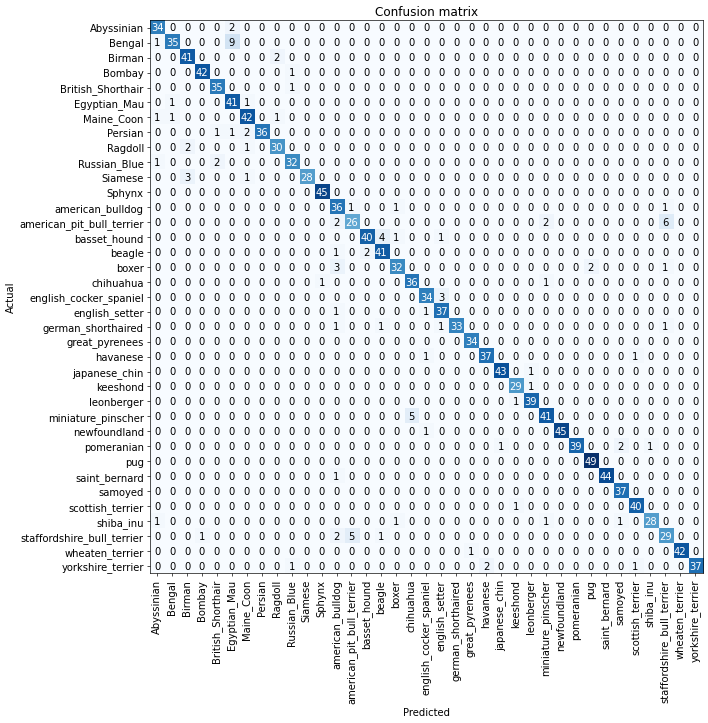

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [36]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 9),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('miniature_pinscher', 'chihuahua', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

# improving our model
## the learning rate finder (2015 - Leslie Smith)

In [38]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1, base_lr = 0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.697006,4.997873,0.453315,00:36


epoch,train_loss,valid_loss,error_rate,time
0,3.766515,3.360373,0.632612,00:49


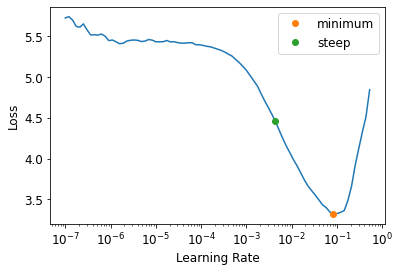

In [39]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [40]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 4.37e-03


In [41]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.297384,0.351479,0.113667,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.541837,0.504021,0.142084,00:50
1,0.327164,0.243086,0.077131,00:50


# unfreezing and transfer learning

In [42]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.134652,0.343405,0.108254,00:37
1,0.533877,0.303526,0.089986,00:37
2,0.323945,0.237726,0.075101,00:37


In [43]:
learn.unfreeze()

SuggestedLRs(valley=4.786300905834651e-06)

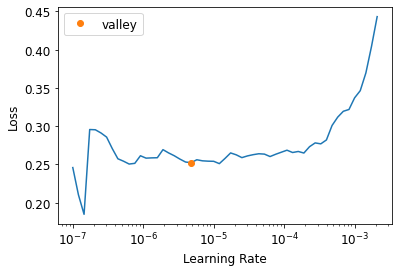

In [44]:
learn.lr_find()

In [45]:
learn.fit_one_cycle(6, lr_max = 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.272089,0.225487,0.071719,00:49
1,0.252537,0.222195,0.064953,00:49
2,0.222447,0.214265,0.063599,00:49
3,0.196684,0.215856,0.064953,00:49
4,0.188765,0.213102,0.061570,00:49
5,0.181254,0.208156,0.060217,00:49


## discriminative learning rates

In [46]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.121819,0.358011,0.119756,00:37
1,0.493112,0.245690,0.083221,00:36
2,0.313765,0.219670,0.074425,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.258857,0.215642,0.067659,00:49
1,0.240620,0.211635,0.066982,00:49
2,0.230390,0.212565,0.064276,00:49
3,0.224558,0.207177,0.062923,00:49
4,0.178680,0.201451,0.062923,00:49
5,0.168936,0.193244,0.060217,00:49
6,0.152968,0.189110,0.054127,00:49
7,0.143682,0.184636,0.055480,00:49
8,0.150801,0.192026,0.056157,00:49
9,0.130438,0.187263,0.057510,00:49


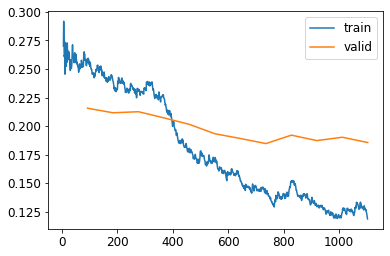

In [47]:
learn.recorder.plot_loss()

## deeper architectures

In [6]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.256114,0.285512,0.094723,00:52
1,0.588202,0.296263,0.094046,00:52
2,0.423424,0.274839,0.083897,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.265620,0.252611,0.069012,01:05
1,0.320881,0.368144,0.100812,01:05
2,0.251371,0.272423,0.081191,01:05
3,0.157453,0.250502,0.071719,01:05
4,0.094876,0.223446,0.060217,01:05
5,0.050841,0.204042,0.058863,01:05
